___
# E-commerce Company Project

## Topic:

I just picked up an example contract with an e-commerce company in New York that sells clothing online, but they also offer in-store style sessions with personal stylists. Customers can meet with a stylist in the store, then later order the clothes they want through either the mobile app or the website.

The company is trying to figure out whether they should focus more on improving the mobile app experience or the website, and they’ve brought me on to help them make that decision. We’ll dig into the customer data together (don’t worry—it’s all fake data, no real credit cards or emails involved).

## Imports
** Import pandas, numpy, matplotlib, and seaborn. **

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [2]:
ecom = pd.read_csv('/Users/vinay/Downloads/Ecommerce Customers')

**Checking the head of customers, and check out its info() and describe() methods.**

In [5]:
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
ecom.info() # This shows that there are no null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
ecom.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the analysis, we'll only be using the numerical data of the CSV file.
___
**Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

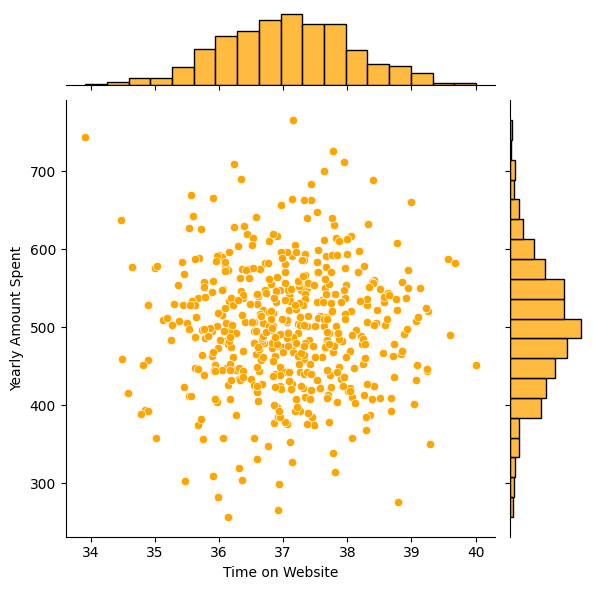

In [14]:
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = ecom,color = 'orange')
plt.show()

# This plot shows that customers’ yearly spending doesn’t have a clear relationship with the time they spend on the 
# website, as the points are fairly scattered without a strong trend.

**Doing the same but with the Time on App column instead.**

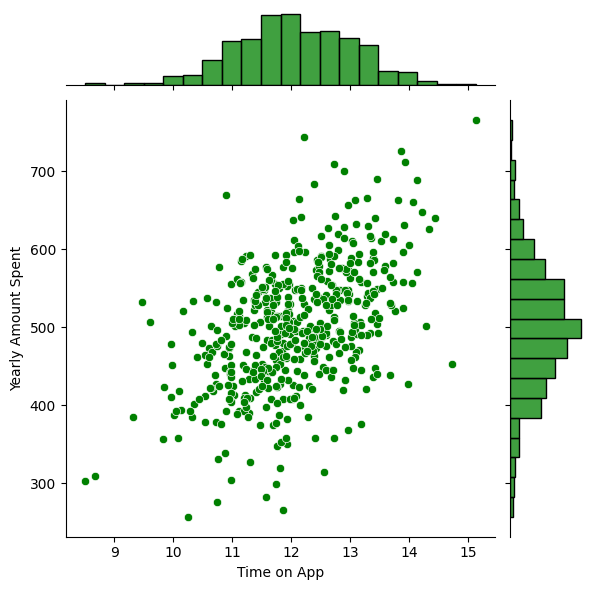

In [15]:
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = ecom,color = 'green')
plt.show()

# This plot shows a clear positive relationship: customers who spend more time on the app tend to spend 
# more money yearly.

**Using jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

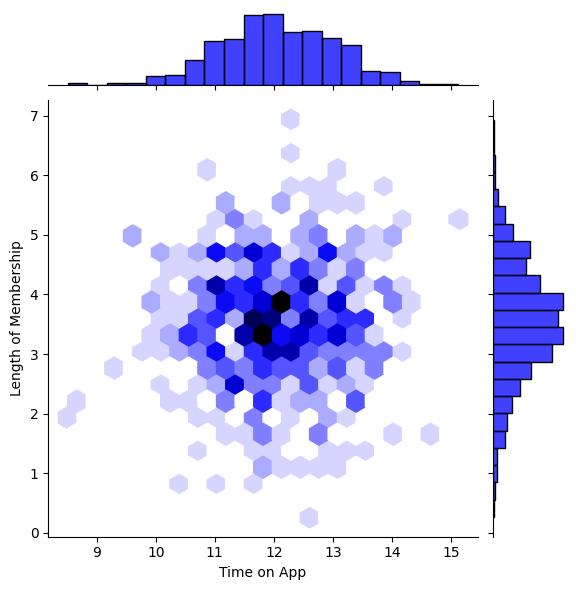

In [19]:
sns.jointplot(x = 'Time on App', y = 'Length of Membership', data = ecom,color = 'blue', kind = 'hex')
plt.show()

# This hexbin plot shows that most customers cluster around spending 12 hours on the app and having a membership length
# of about 3–5 years, with no strong linear relationship between the two.

**Let's explore these types of relationships across the entire data set. Use pairplot to recreate the plot below.**

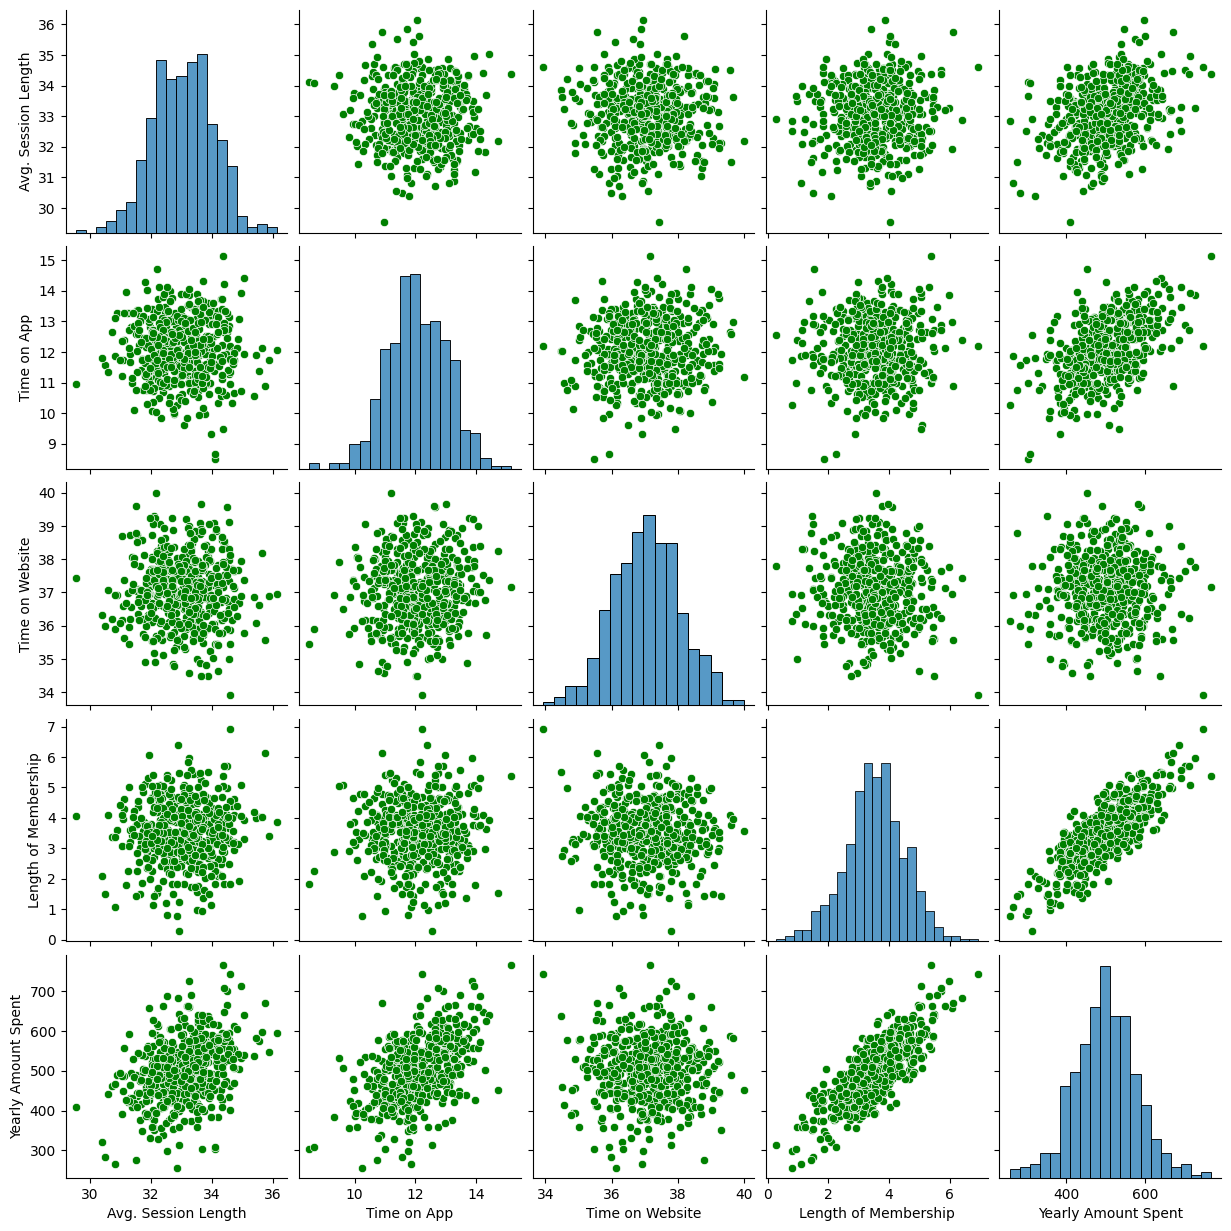

In [39]:
sns.pairplot(data=ecom, plot_kws={"color": "green"})
plt.show()

**From the plot, it looks like Length of Membership has the strongest relationship with Yearly Amount Spent, followed by Time on App, showing the next strongest correlation.**

**Creating a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

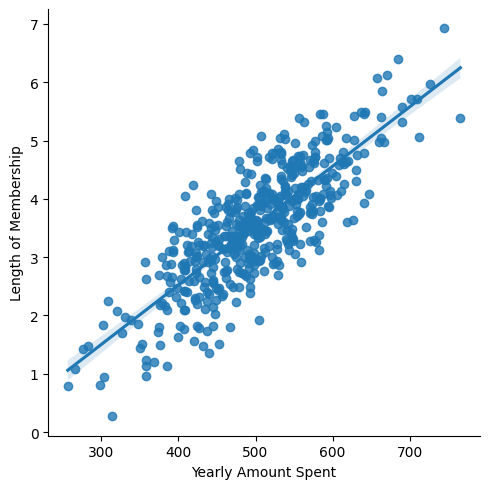

In [47]:
sns.lmplot(y = 'Length of Membership',x = 'Yearly Amount Spent', data = ecom)
plt.show()

## This shows that customers tend to spend more each year the longer they’ve been members.

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
X = ecom[['Avg. Session Length', 'Time on App', 'Time on Website',	'Length of Membership']]
y = ecom['Yearly Amount Spent']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

In [54]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [56]:
lm.fit(X_train, y_train)

LinearRegression()

**Printing out the coefficients of the model**

In [57]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [61]:
lm.score(X_train, y_train)

0.9817562058732432

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [63]:
prediction = lm.predict(X_test)

** Creating a scatterplot of the real test values versus the predicted values. **

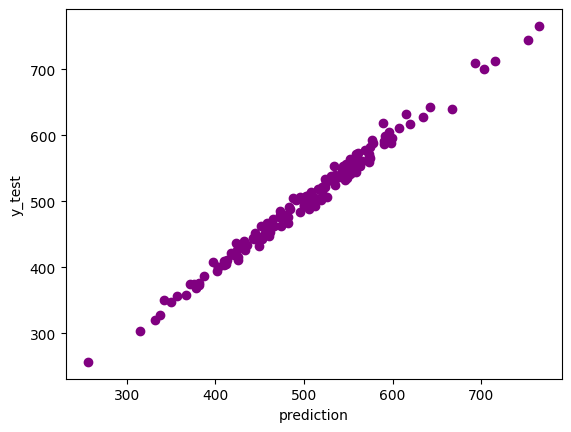

In [73]:
plt.scatter(prediction, y_test, color = 'purple')
plt.xlabel('prediction')
plt.ylabel('y_test')
plt.show()

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [74]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(prediction, y_test))
print('MSE:', metrics.mean_squared_error(prediction, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(prediction, y_test)))

MAE: 7.228148653430817
MSE: 79.81305165097417
RMSE: 8.93381506697862


## Residuals
**Plotting a histogram of the residuals and making sure it looks normally distributed.**

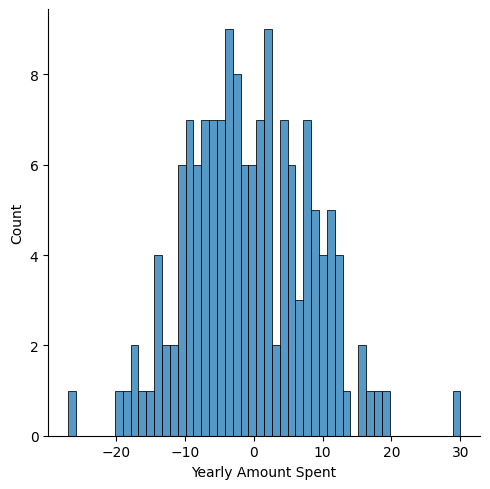

In [82]:
sns.distplot(y_test-prediction, bins = 50)
plt.show()

**It shows that the residuals are roughly centered around zero and form a bell-shaped distribution, which suggests that the model’s errors are approximately normally distributed, a good sign that the linear regression assumptions are being met.**

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.

** Recreating the dataframe below. **

In [85]:
ecom_df = pd.DataFrame(lm.coef_,X.columns)
ecom_df.columns = ['Coefficient']
ecom_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Do you think the company should focus more on their mobile app or on their website? ##

*It looks like customers’ spending is influenced far more by the mobile app than the website, so the company would get the most value by focusing on improving the app experience.*